In [1]:
import tensorflow as tf
tfe = tf.contrib.eager

tf.enable_eager_execution()


In [2]:
x = tf.zeros([10,10])
x += 2

print(x)

tf.Tensor(
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tfe.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

In [4]:
class Model(object):
    def __init__(self):
        self.W = tfe.Variable(5.0)
        self.b = tfe.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [5]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [6]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [8]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current Loss: '),
print(loss(model(inputs), ouputs).numpy())

TypeError: object of type 'EagerTensor' has no len()

In [9]:
print(tf.__version__)
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

1.10.0


Epoch  0: W=5.00 b=0.00, loss=8.45074
Epoch  1: W=4.62 b=0.37, loss=5.89049
Epoch  2: W=4.31 b=0.68, loss=4.20706
Epoch  3: W=4.07 b=0.92, loss=3.10016
Epoch  4: W=3.86 b=1.12, loss=2.37235
Epoch  5: W=3.70 b=1.28, loss=1.89379
Epoch  6: W=3.57 b=1.41, loss=1.57912
Epoch  7: W=3.46 b=1.52, loss=1.37222
Epoch  8: W=3.37 b=1.61, loss=1.23618
Epoch  9: W=3.30 b=1.68, loss=1.14672


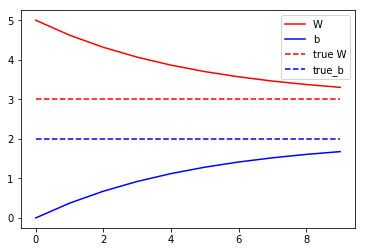

In [10]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()